<a href="https://colab.research.google.com/github/ElsayedSalemRashad/PNP_Circle_Model/blob/main/coningham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import files

uploaded = files.upload()


Saving pmain125.txt to pmain125 (1).txt


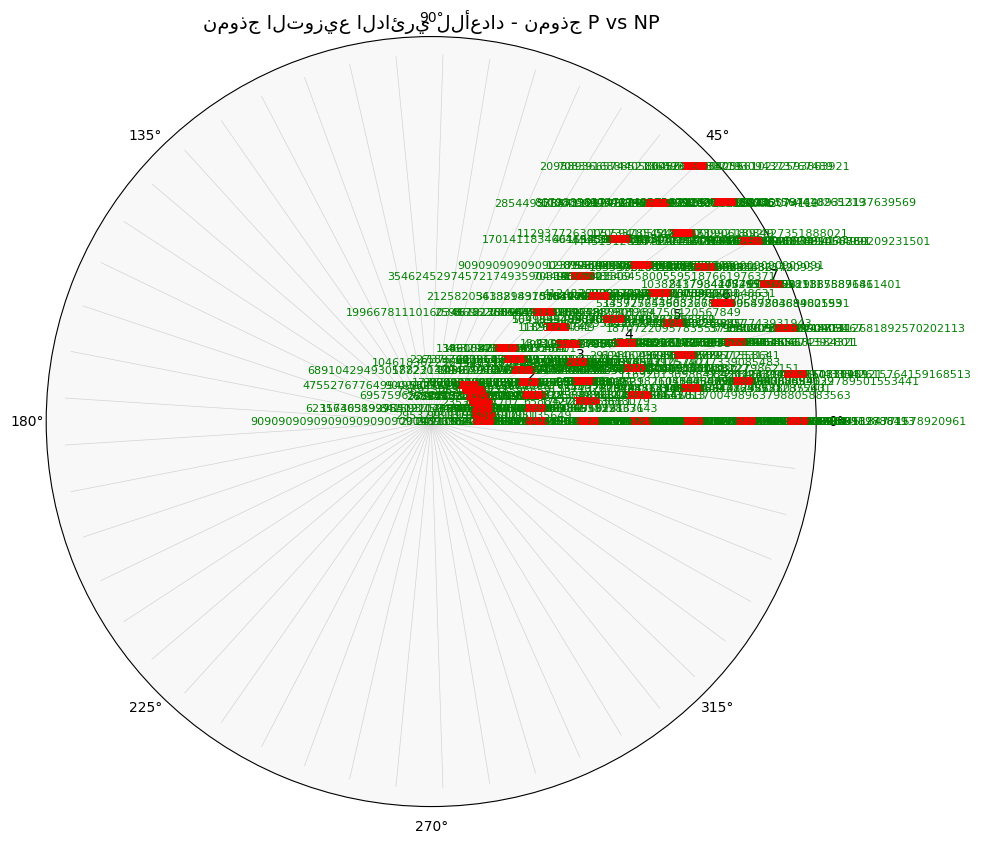

In [20]:
import matplotlib.pyplot as plt
import math
from sympy import isprime

# 🧠 اقرأ الأرقام من الملف النصي
def read_numbers_from_file(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
        numbers = []
        for line in lines:
            for part in line.strip().split():
                if part.isdigit():
                    numbers.append(int(part))
        return numbers

# 📡 توزيع الأرقام على نموذج الدوائر والطبقات
def circular_distribution(numbers, layers=7, rings=7):
    max_number = max(numbers)
    total_slots = layers * rings
    theta_gap = 360 / total_slots

    coords = []
    for i, n in enumerate(numbers):
        slot = i % total_slots
        r = (slot // rings) + 1
        theta = (slot % rings) * theta_gap
        coords.append((r, theta, n))
    return coords

# 🌀 الرسم بالرادار المقسم (دوائر وخطوط)
def draw_radar_chart(coords):
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
    ax.set_facecolor('#f8f8f8')
    ax.grid(False)

    # 🏗️ رسم 7 دوائر رئيسية
    for r in range(1, 8):
        ax.plot([0, 2 * math.pi], [r, r], color='gray', lw=0.4, linestyle='--')

    # 🪄 رسم الخطوط الشعاعية
    for i in range(49):  # 7 × 7 = 49 قسم
        angle = (2 * math.pi / 49) * i
        ax.plot([angle, angle], [0, 7], color='lightgray', lw=0.5)

    # 🔢 رسم الأرقام
    for r, theta_deg, n in coords:
        theta_rad = math.radians(theta_deg)
        color = 'green' if isprime(n) else 'red'
        ax.text(theta_rad, r, str(n), fontsize=8, ha='center', va='center', color=color)

    plt.title('نموذج التوزيع الدائري للأعداد - نموذج P vs NP', fontsize=14)
    plt.show()

# 🚀 تنفيذ النموذج
filename = 'pmain125.txt'  # ← اسم الملف الذي رفعته
numbers = read_numbers_from_file(filename)
coords = circular_distribution(numbers)
draw_radar_chart(coords)